In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Importing evaluation metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer

In [4]:
data = pd.read_csv('../data/preprocessed_data.csv') 

In [5]:
X = data.drop(columns=['student_id', 'question_id', 'answered_correctly'])
y = data['answered_correctly']


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Evaluating Logistic Regression...
Accuracy of LogisticRegression: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9334
           1       1.00      1.00      1.00      9657

    accuracy                           1.00     18991
   macro avg       1.00      1.00      1.00     18991
weighted avg       1.00      1.00      1.00     18991



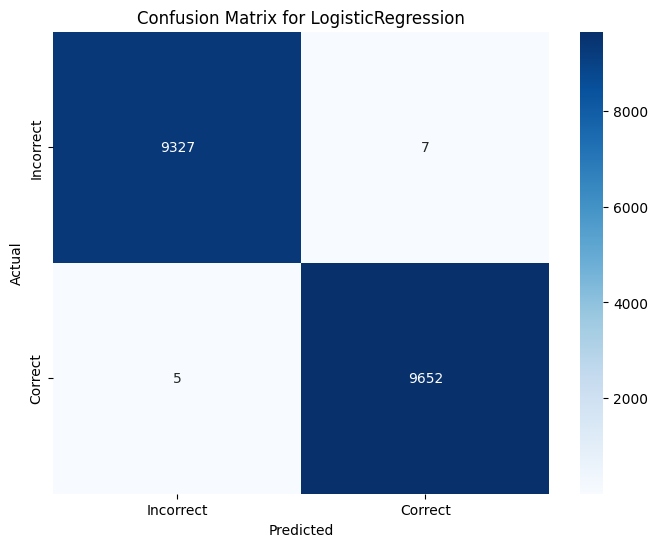


Evaluating Random Forest...
Accuracy of RandomForestClassifier: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9334
           1       1.00      1.00      1.00      9657

    accuracy                           1.00     18991
   macro avg       1.00      1.00      1.00     18991
weighted avg       1.00      1.00      1.00     18991



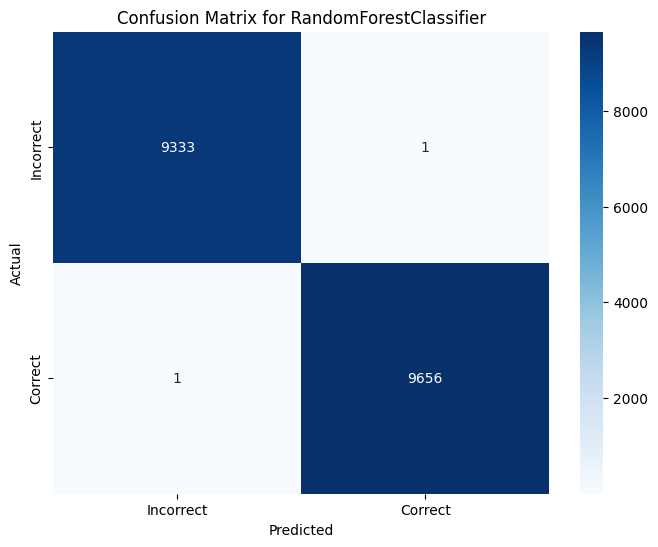


Evaluating XGBoost...


C:\Users\Rmkmr\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [17:42:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy of XGBClassifier: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9334
           1       1.00      1.00      1.00      9657

    accuracy                           1.00     18991
   macro avg       1.00      1.00      1.00     18991
weighted avg       1.00      1.00      1.00     18991



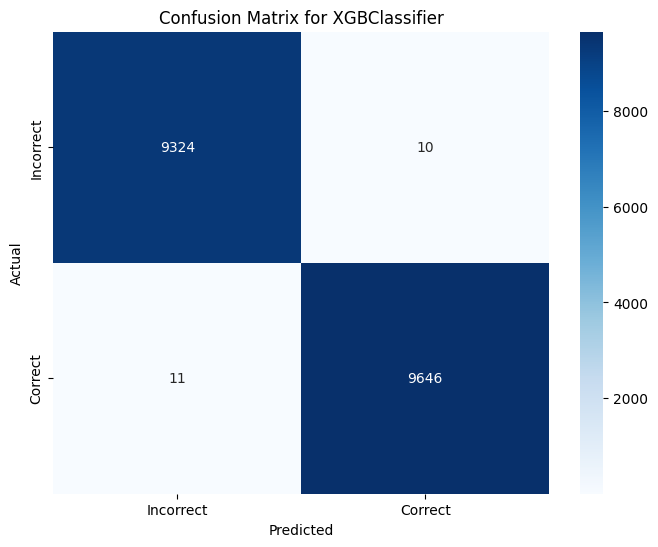

In [7]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy of {model.__class__.__name__}: {accuracy:.2f}')
    
    # Classification report
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Incorrect', 'Correct'], yticklabels=['Incorrect', 'Correct'])
    plt.title(f'Confusion Matrix for {model.__class__.__name__}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Evaluate each model
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    evaluate_model(model, X_train, X_test, y_train, y_test)


In [10]:
# Prepare features and target
X = data[['ability', 'difficulty', 'year', 'correctness_rate', 'attempts_count', 'adjusted_ability']]
y = data['answered_correctly']

# Define the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)
}

# Evaluate each model using k-fold cross-validation
results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
    results[name] = cv_scores.mean()  # Average accuracy across folds

# Print out the results
for model_name, mean_accuracy in results.items():
    print(f"{model_name} Mean Accuracy: {mean_accuracy:.4f}")

C:\Users\Rmkmr\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [17:59:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Rmkmr\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [17:59:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Rmkmr\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [17:59:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are no

Logistic Regression Mean Accuracy: 0.9993
Random Forest Mean Accuracy: 0.9998
XGBoost Mean Accuracy: 0.9992


C:\Users\Rmkmr\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [17:59:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


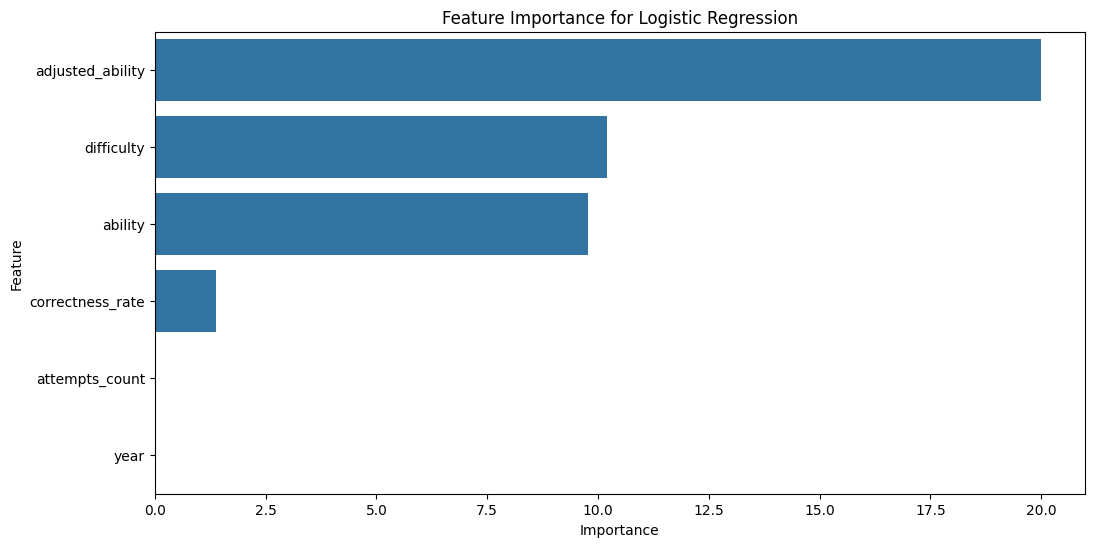

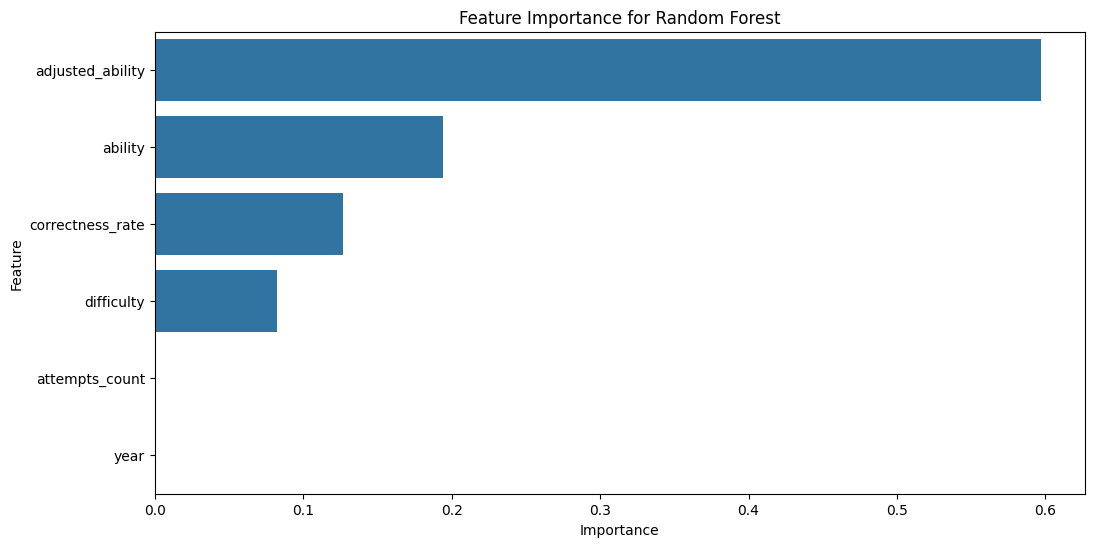

C:\Users\Rmkmr\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [18:05:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


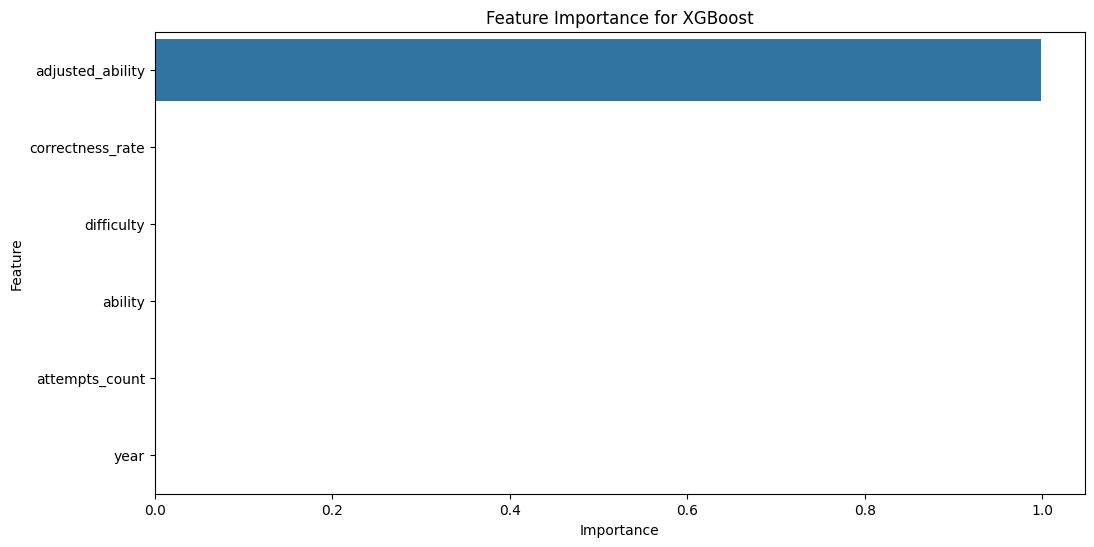

In [11]:
def plot_feature_importance(model, feature_names, model_name):
    # Logistic Regression coefficients
    if model_name == 'Logistic Regression':
        importances = abs(model.coef_[0])
    else:
        importances = model.feature_importances_
    
    # Create a DataFrame for visualization
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    # Plotting
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title(f'Feature Importance for {model_name}')
    plt.show()

# Evaluate and plot feature importance for each model
for name, model in models.items():
    model.fit(X_train, y_train)  # Fit the model to get feature importances
    plot_feature_importance(model, X_train.columns, name)

# Removing correctness_rate as it introduces data leakage

In [12]:
# Prepare features and target
X = data[['ability', 'difficulty', 'year', 'attempts_count', 'adjusted_ability']]
y = data['answered_correctly']

# Define the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)
}

# Evaluate each model using k-fold cross-validation
results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
    results[name] = cv_scores.mean()  # Average accuracy across folds

# Print out the results
for model_name, mean_accuracy in results.items():
    print(f"{model_name} Mean Accuracy: {mean_accuracy:.4f}")

C:\Users\Rmkmr\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [18:16:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Rmkmr\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [18:16:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Rmkmr\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [18:16:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are no

Logistic Regression Mean Accuracy: 0.9994
Random Forest Mean Accuracy: 0.9999
XGBoost Mean Accuracy: 0.9989


C:\Users\Rmkmr\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [18:16:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [14]:
# Prepare features and target
X = data[['ability', 'difficulty', 'year', 'attempts_count', 'adjusted_ability']]
y = data['answered_correctly']

# Define the models with hyperparameters
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, penalty='l2', C=1.0),  # L2 regularization
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, class_weight='balanced', random_state=42),  # Regularization via max_depth and min_samples_split
    "XGBoost": XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, scale_pos_weight=len(y[y == 0]) / len(y[y == 1]), eval_metric='mlogloss')
  # Regularization via max_depth and scale_pos_weight
}

# Evaluate each model using k-fold cross-validation
results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
    results[name] = cv_scores.mean()  # Average accuracy across folds

# Print out the results
for model_name, mean_accuracy in results.items():
    print(f"{model_name} Mean Accuracy: {mean_accuracy:.4f}")

Logistic Regression Mean Accuracy: 0.9994
Random Forest Mean Accuracy: 0.9999
XGBoost Mean Accuracy: 0.9988
